## By Gugun, Garvit, Swayam and Govind


Sentiment Analysis for Online Reviews


In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\swaya\OneDrive\Desktop\sen_analysis_project\file.csv",encoding='utf-8')

In [3]:
df.shape

(219294, 3)

In [4]:
df.head()

,Unnamed: 0,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [5]:
df.tail()

,Unnamed: 0,tweets,labels
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad
219293,219293,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",neutral


# Data cleaning

In [6]:
df.tail()

,Unnamed: 0,tweets,labels
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad
219293,219293,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",neutral


In [7]:
df.isnull().values.any()

False

In [8]:
d_type = df["labels"].dtype
print(d_type)

object


In [9]:
d_type = df["tweets"].dtype
print(d_type)

object


In [10]:
values_count= df["labels"].value_counts()
print(values_count)

labels
bad        107796
good        56011
neutral     55487
Name: count, dtype: int64


<Axes: xlabel='labels', ylabel='count'>

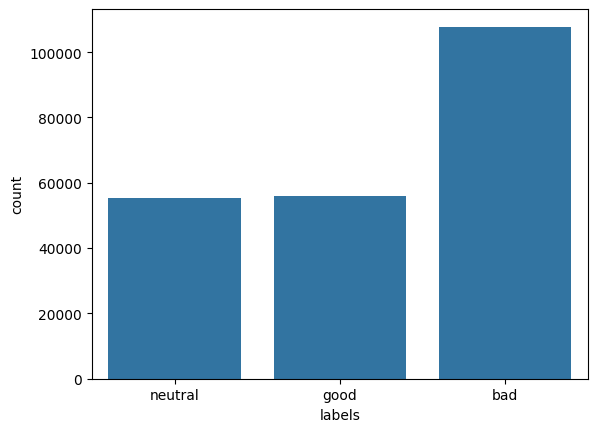

In [11]:
import seaborn as sns
sns.countplot(x='labels', data=df)


# Data Preprocessing 

In [12]:
df['tweets'][2]

'ChatGPT: Optimizing Language Models for Dialogue https://t.co/GLEbMoKN6w #AI #MachineLearning #DataScience #ArtificialIntelligence\\n\\nTrending AI/ML Article Identified &amp; Digested via Granola; a Machine-Driven RSS Bot by Ramsey Elbasheer https://t.co/RprmAXUp34'

In [13]:
import nltk
import re
from nltk.corpus import stopwords
from keras.models import Sequential
from keras_preprocessing.text import one_hot, Tokenizer
from keras.utils import pad_sequences
from sklearn.model_selection import train_test_split
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from keras.utils import pad_sequences

In [14]:
def remove(text):
    # Define a regular expression pattern to match URLs and HTML tags
    pattern =re.compile(r'https?://\S+|www\.\S+|<[^\>]+>|\n')
    # Remove URLs and HTML tags from the text using the sub() function
    return pattern.sub('', text)

# def remove_tag(text):
#     TAG_RE = re.compile(r'<[^\>]+>')
#     return TAG_RE.sub('',text)




# def remove_links(text):
#     url_pattern = r'https?://\S+|www\.\S+'
#     return re.sub(url_pattern, '', text)


In [15]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\swaya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
def preprocess_text(sen):
    #make the sentences in the lower case 
    sentence = sen.lower()
    
    #remove the html tags and links
    sentence = remove(sentence)
    
    #remove the punctuations and numbers
    sentence = re.sub('[^a-zA-Z]'," ",sentence)
    
    #remove the single character
    sentence =re.sub(r'\s+[a-zA-Z]\s+'," ",sentence)
    
    #remove multiple spaces
    sentence = re.sub(r'\s+'," ",sentence)
    
    pattern = re.compile(r'\b(' + r'|'.join(stopwords.words ('english')) + r')\b\s*')
    sentence = pattern.sub('', sentence)
    return sentence

In [17]:
#calling the funciton to preprocess the text

x=[]
sentences = list(df['tweets'])
for sen in sentences:
    x.append(preprocess_text(sen))

In [18]:
x[1]
#cleaned up data

'try talking chatgpt new ai system optimized dialogue feedback help us improve '

In [122]:
from numpy import array

In [123]:
#conveting sentiments lables into 0, 1, 2.
#where, 0:neutral, 1:good, 2:bad.

y = df["labels"]
y = np.array(list(map(lambda x: 1 if x=="good" else 2 if x=="neutral" else 0,y)))

In [124]:
#splitting of data sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#Train set used to train our deep learning model.
#Test set used to evaluate how well our model perform.

# Preparing Embedding Layer
## ---first step to deep learning models in keras

In [125]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, GlobalMaxPooling1D, Embedding, Conv1D, LSTM, Activation, Dropout, Dense


In [126]:
#this part used to convert words into numeric form
#using tokenizer function from keras, method fit_on_text trains the tokenizer 
#method text_to_sequence converts sentences into numeric form

word_tokenizer=Tokenizer()
word_tokenizer.fit_on_texts(x_train)

x_train=word_tokenizer.texts_to_sequences(x_train)
x_test=word_tokenizer.texts_to_sequences(x_test)



In [127]:
# Adding 1 to store dimensions for words for which no pretrained word embeddings exist

vocab_length = len(word_tokenizer.word_index) + 1

vocab_length

82084

In [128]:
# Padding all reviews to fixed length 100

maxlen = 100

#The argument padding='post' ensures that padding happens after the original text (not before).

x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)

In [129]:
# Load GloVe word embeddings and create an Embeddings Dictionary

from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('a2_glove.6B.100d (1).txt', encoding="utf8")

for line in glove_file:     
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

1. What is GloVe?
GloVe (Global Vectors for Word Representation) is a pre-trained system that takes a word (like "apple" or "cat") and gives you a list of numbers (a vector) that represents that word in a meaningful way. These lists of numbers (or word embeddings) help machines understand the meaning of words by capturing their relationship to other words.

You can think of this vector like coordinates on a map: similar words are located close together (e.g., "king" and "queen"), and dissimilar words are far apart (e.g., "apple" and "sky").

2. Purpose of This Code:
The goal of this code is to load the GloVe pre-trained word embeddings into memory so that you can later use them in your machine learning model.

GloVe File: a2_glove.6B.100d (1).txt is a file that contains many words along with their corresponding vectors (lists of numbers). Each word has a 100-dimensional vector in this case.
3. Explanation of Each Line:
1. embeddings_dictionary = dict()
This creates an empty dictionary called embeddings_dictionary. In simple terms, a dictionary is like a real-life dictionary where you have words and their meanings. Here, each word (like "cat") will be the key, and its corresponding vector (the list of numbers) will be the value.

2. glove_file = open('a2_glove.6B.100d (1).txt', encoding="utf8")
This line opens the GloVe file (a2_glove.6B.100d (1).txt). This file contains rows where each row is a word followed by its vector.

For example, a row in the file might look like this:
bash
Copy code
cat 0.321 -0.123 0.908 ... (100 numbers total)
Here, the word is "cat," and the numbers next to it represent its vector. This vector gives information about how "cat" is related to other words in the language.

3. for line in glove_file:
This line starts a loop that goes through the GloVe file line by line. Each line contains one word and its corresponding list of numbers (the vector).

4. records = line.split()
The line.split() function splits the line into individual pieces.
The first piece will be the word (e.g., "cat").
The rest of the pieces will be the numbers (the vector).
For example, if the line is:

code:
cat 0.321 -0.123 0.908 ...
After splitting, you get:

code:
["cat", "0.321", "-0.123", "0.908", ...]
5. word = records[0]
Here, we take the first item of the split line, which is the word (e.g., "cat"), and store it in the variable word.

6. vector_dimensions = asarray(records[1:], dtype='float32')
This line takes the rest of the items in the list (from records[1:]), which are the numbers representing the word's vector, and converts them into a NumPy array (a fancy way to handle numbers efficiently in Python).

The asarray() function is just a way to convert the list of numbers into a format that can be used for mathematical operations.

The dtype='float32' means that the numbers will be stored as floating-point numbers, which are numbers with decimals (e.g., 0.321).

So after this line, vector_dimensions will contain the list of numbers like this:

code:
[0.321, -0.123, 0.908, ...]  (100 numbers total)
7. embeddings_dictionary[word] = vector_dimensions
This line stores the word and its vector into the dictionary.

For example:

The key (word) is "cat."
The value (vector) is [0.321, -0.123, 0.908, ...].
So after this step, your embeddings_dictionary will look something like:

python code:
{
  "cat": [0.321, -0.123, 0.908, ...],
  "dog": [0.654, -0.098, 0.456, ...],
  "king": [0.765, 0.123, -0.345, ...],
  ...
}
This dictionary allows you to quickly look up any word and get its corresponding vector.

8. glove_file.close()
This line closes the file when you’re done reading it. It’s a good habit to close files after you’re finished with them to free up system resources.

Final Overview:
This entire block of code is reading a pre-trained word embedding file (GloVe), extracting each word and its vector, and storing them in a Python dictionary. Later, this dictionary can be used to look up the vector for any word in your dataset.

For example:

If you want to know the vector for the word "apple," you can simply do:
python
Copy code
apple_vector = embeddings_dictionary["apple"]
This vector will then be used in your model to represent the meaning of the word "apple" in a numerical form.

In [130]:
# Create Embedding Matrix having 100 columns 
# Containing 100-dimensional GloVe word embeddings for all words in our corpus.

embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

embedding_matrix = zeros((vocab_length, 100))
This line creates an empty matrix (basically, a big table of numbers) with vocab_length rows and 100 columns.

What are vocab_length and 100?

vocab_length: This is the number of unique words in your dataset (the total number of words that your tokenizer has seen and indexed). Each word in your vocabulary will get its own row in the matrix.
100: This represents the size of the word vectors. Since you are using GloVe embeddings that have 100 dimensions, each word will be represented by 100 numbers.
The zeros() function simply fills the entire matrix with zeros to start with, because initially, you haven’t yet added any word vectors to it.

Example:
If vocab_length = 5000, this matrix will be 5000 rows and 100 columns, and at the start, it will look like this (filled with zeros):


[[0, 0, 0, ..., 0],  # Row for the first word
 [0, 0, 0, ..., 0],  # Row for the second word
 ...
 [0, 0, 0, ..., 0]]  # Row for the 5000th word

for word, index in word_tokenizer.word_index.items():
This line starts a loop that goes through each word in your vocabulary (the words your tokenizer has seen in your dataset).

word_tokenizer.word_index.items():

The tokenizer has a list of words it has encountered, and each word has an index (a unique number).
Example:
{
  "cat": 1,   # "cat" is assigned index 1
  "dog": 2,   # "dog" is assigned index 2
  "apple": 3  # "apple" is assigned index 3
}
For each word in this list, the loop will get two things:

The word itself (like "cat" or "apple").
The index (its position in the vocabulary list, like 1 for "cat").
embedding_vector = embeddings_dictionary.get(word)
You are looking up the GloVe embedding (the list of 100 numbers) for the current word.

embeddings_dictionary.get(word):

embeddings_dictionary is a big dictionary that you created earlier, which stores the GloVe embeddings for thousands of words.
The get() function is used to check if the word is in this dictionary.
If the word is found, it returns the embedding vector for that word (e.g., for "cat," it might return [0.321, -0.123, 0.908, ...]).
If the word is not found in the dictionary, it returns None.
if embedding_vector is not None:
This line checks whether the GloVe embedding for the word was found.

If the GloVe embedding is found (i.e., embedding_vector is not None), then the next line runs. If the GloVe embedding is not found, the code simply skips that word.

embedding_matrix[index] = embedding_vector
This line assigns the GloVe embedding (the list of 100 numbers) to the correct row in the embedding_matrix.

What does this mean?

The index variable tells us which row in the matrix corresponds to the word (e.g., "cat" might be at row 1, "dog" at row 2, etc.).
The embedding_vector is the list of 100 numbers that represents the word.
Example:

If the word "cat" is at index 1 in the vocabulary, and its embedding vector is [0.321, -0.123, 0.908, ...], then the matrix will now look like this:

In [131]:
embedding_matrix.shape

(82084, 100)

In [132]:
embedding_matrix[100]

array([-0.086022  , -0.2014    ,  0.0733    ,  0.12854999, -0.41258001,
       -0.17367999, -0.62493002, -0.35870001,  0.25587001, -0.25722   ,
       -0.32925999,  0.17169   , -0.042653  , -0.15132   ,  0.12459   ,
        0.47240001, -0.61831999, -0.13643   , -0.12512   ,  0.33873001,
       -0.035621  , -0.89516002, -0.35194001, -0.15008999, -0.43491   ,
        0.57903999, -0.41479   ,  0.29122001,  0.026247  ,  0.11913   ,
       -0.097227  , -0.17329   , -0.39910999,  0.11352   ,  0.29001001,
        0.50463003,  0.65483999, -1.07529998, -0.29124999, -0.019419  ,
       -0.36204001,  0.041031  , -0.41464999, -0.55598998,  0.2457    ,
       -0.23624   ,  0.58607   , -0.088436  ,  0.31933001, -0.98869002,
        0.15107   ,  0.20586   , -0.74953002, -0.18176   ,  0.16462   ,
       -0.71087003,  0.60004997, -1.01479995,  1.23590004, -0.59306002,
       -0.27922001,  0.24823999, -0.0335    ,  0.23328   ,  0.81967002,
        0.14407   , -0.69406998,  0.47200999,  0.19464   , -0.84

In [133]:
import pandas as pd
import numpy as np

In [134]:
# Convert the embedding matrix to a DataFrame
embedding_df = pd.DataFrame(embedding_matrix)

# Export the DataFrame to Excel
# embedding_df.to_excel("embedding_matrix.xlsx", index=False, header=False , float_format="%.6f")

#Export the DataFrame to CSV
embedding_df.to_csv("embedding_matrix.csv", index=True, header=False)

print(f"Matrix shape: {embedding_matrix.shape}")
print(f"First row of the matrix: {embedding_matrix[0]}")

Matrix shape: (82084, 100)
First row of the matrix: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


# MODEL TRAINING

### SEQUENTIAL NEURAL NETWORK

In [135]:
snn_model = Sequential([
    Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Flatten(),
    Dense(128, activation='relu'),  # Increase to 128 or more units
    Dropout(0.5),  # Add dropout to prevent overfitting
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # Keep sigmoid for binary classification
])


# snn_model=Sequential([
#     Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(1, activation='sigmoid')
    
# ])


# embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
# snn_model.add(embedding_layer)
# snn_model.add(Flatten())
# snn_model.add(Dense(1,activation='sigmoid'))

snn_model.build(input_shape=(None, maxlen))


c:\Users\swaya\OneDrive\Desktop\sen_analysis_project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Sequential() is used to define a linear stack of layers in the neural network. It’s a simple way to build a feed-forward network.

Embedding layer:
vocab_length: Size of the vocabulary.

100: Dimension of the GloVe embeddings (each word is represented by a 100-dimensional vector).

weights=[embedding_matrix]: The pre-trained GloVe embeddings are used as weights in this layer.

input_length=maxlen: Maximum length of the input sequences (tweets in this case).

trainable=False: The embeddings are not updated during training.

This layer converts the input text data into dense vectors of fixed size based on the GloVe embeddings.

Flatten Layer:
Flatten() is used to convert the 2D output from the embedding layer into a 1D vector, making it suitable for the next dense layer.
Dense Layer:

Dense(1, activation='sigmoid'):
A dense (fully connected) layer with 1 output unit.
The sigmoid activation function is used for binary classification, outputting a probability between 0 and 1.

snn_model.build(input_shape=(None, maxlen)) : is very neccessary because Despite compilation, the model is still showing unbuilt layers and no trainable parameters. This usually happens when the model hasn't been provided with input shape information.This issue is solved by this.

In [136]:
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0005)  # Decrease the learning rate
#model compilation
snn_model.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['acc'])
print(snn_model.summary())

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ (None, 100, 100)       │     8,208,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 10000)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 128)            │     1,280,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,496,979 (36.23 MB)

 Trainable params: 1,288,579 (4.92 MB)

 Non-trainable params: 8,208,400 (31.31 MB)

None


Optimizer:
    adam: A popular optimizer that adapts the learning rate during training.
Loss Function:
    binary_crossentropy: Used for binary classification tasks.
Metrics:
    acc: Tracks the accuracy during training.

Prints a summary of the model, showing the layers and the number of parameters.

In [137]:
from keras.utils import to_categorical

# Convert y_train and y_test to one-hot encoding
y_train = to_categorical(y_train, num_classes=3)
y_test = to_categorical(y_test, num_classes=3)


# model training
snn_model_history = snn_model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)


Epoch 1/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 30s 26ms/step - acc: 0.5910 - loss: 0.8838 - val_acc: 0.6666 - val_loss: 0.7423
Epoch 2/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 29s 27ms/step - acc: 0.6733 - loss: 0.7344 - val_acc: 0.6799 - val_loss: 0.7129
Epoch 3/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - acc: 0.6975 - loss: 0.6847 - val_acc: 0.6918 - val_loss: 0.6998
Epoch 4/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - acc: 0.7172 - loss: 0.6486 - val_acc: 0.6919 - val_loss: 0.6946
Epoch 5/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - acc: 0.7312 - loss: 0.6202 - val_acc: 0.6987 - val_loss: 0.6859
Epoch 6/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 29s 26ms/step - acc: 0.7453 - loss: 0.5918 - val_acc: 0.7000 - val_loss: 0.6881


In [138]:
# Predictions on the Test Set
score = snn_model.evaluate(x_test, y_test, verbose=1)

1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - acc: 0.6967 - loss: 0.6923


In [142]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.6935665607452393
Test Accuracy: 0.6956154704093933


X_test and y_test: Test data and labels.

score: Contains the loss and accuracy of the model on the test set.

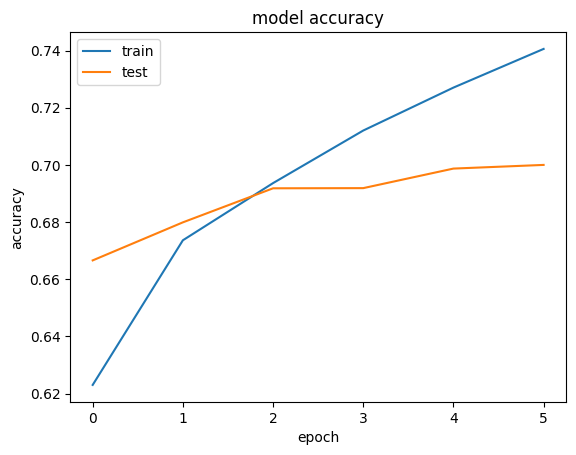

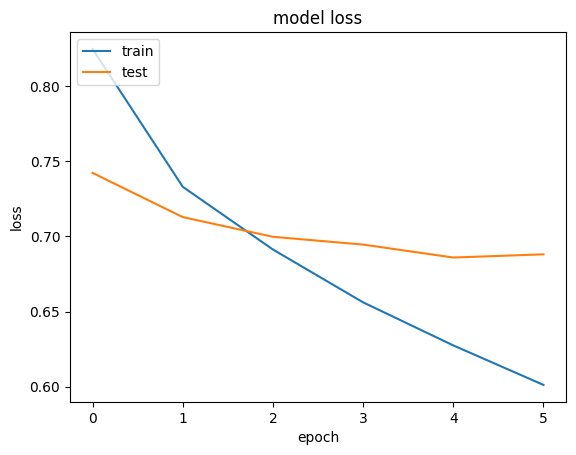

In [143]:
# Performance Visualization

import matplotlib.pyplot as plt

plt.plot(snn_model_history.history['acc'])
plt.plot(snn_model_history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(snn_model_history.history['loss'])
plt.plot(snn_model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [146]:
ls #lists files in working directory

 Volume in drive C is Windows
 Volume Serial Number is 642F-B5AF

 Directory of c:\Users\swaya\OneDrive\Desktop\sen_analysis_project


 Directory of c:\Users\swaya\OneDrive\Desktop\sen_analysis_project


 Directory of c:\Users\swaya\OneDrive\Desktop\sen_analysis_project


 Directory of c:\Users\swaya\OneDrive\Desktop\sen_analysis_project


 Directory of c:\Users\swaya\OneDrive\Desktop\sen_analysis_project



File Not Found


1371/1371 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step


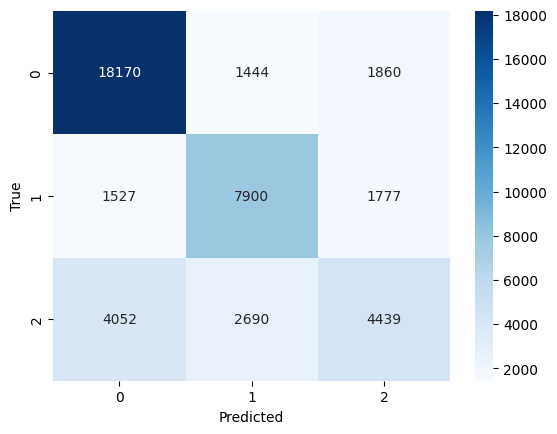

              precision    recall  f1-score   support

           0       0.77      0.85      0.80     21474
           1       0.66      0.71      0.68     11204
           2       0.55      0.40      0.46     11181

    accuracy                           0.70     43859
   macro avg       0.66      0.65      0.65     43859
weighted avg       0.68      0.70      0.68     43859



In [147]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = np.argmax(snn_model.predict(x_test), axis=-1)
y_true = np.argmax(y_test, axis=-1)

conf_matrix = confusion_matrix(y_true, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print(classification_report(y_true, y_pred))


Confusion Matrix: Analyze the confusion matrix to understand where the model is making errors. This can help you identify if there is a class imbalance issue or if certain classes are harder for the model to predict.

In [148]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
snn_model_history = snn_model.fit(x_train, y_train, batch_size=128, epochs=20, verbose=1, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - acc: 0.7580 - loss: 0.5686 - val_acc: 0.7002 - val_loss: 0.6912
Epoch 2/20
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - acc: 0.7647 - loss: 0.5483 - val_acc: 0.6982 - val_loss: 0.6946
Epoch 3/20
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - acc: 0.7727 - loss: 0.5330 - val_acc: 0.7003 - val_loss: 0.6954
Epoch 4/20
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 33s 30ms/step - acc: 0.7821 - loss: 0.5136 - val_acc: 0.6999 - val_loss: 0.7044


Hyperparameter Tuning: Experiment with different hyperparameters such as the number of layers, units in each layer, dropout rates, and learning rates. You might use techniques like Grid Search or Random Search for hyperparameter tuning.

Early Stopping: Implement early stopping to avoid overfitting. This stops training when the validation loss stops improving.

### CONVOLUTIONAL NEURAL NETWORK MODEL

In [150]:
from keras.layers import Conv1D 


Conv1D: Applies convolution along a single dimension (e.g., sequence).

Conv2D: Applies convolution across two dimensions (e.g., images).

Conv3D: Applies convolution across three dimensions (e.g., video frames).

In [153]:
# Neural Network architecture

cnn_model = Sequential([
    Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    Conv1D(128, 5, activation='relu'),
    GlobalMaxPooling1D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # For multi-class classification
])

# embedding_layer = Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
# cnn_model.add(embedding_layer)

# cnn_model.add(Conv1D(128, 5, activation='relu'))
# cnn_model.add(GlobalMaxPooling1D())
# cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.build(input_shape=(None, maxlen))

c:\Users\swaya\OneDrive\Desktop\sen_analysis_project\venv\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Conv1D Layer: Applies 1D convolution to the sequence of word vectors. It uses 128 filters with a kernel size of 5 and ReLU activation to extract features from the text sequences.

GlobalMaxPooling1D Layer: Reduces the dimensionality by taking the maximum value over the sequence length for each feature map. This operation provides a fixed-size output regardless of the input sequence length.

The first Dense layer with 128 units and ReLU activation processes the features extracted by the convolutional and pooling layers.

The Dropout layer with a rate of 0.5 helps to prevent overfitting by randomly setting 50% of the inputs to zero during training.

The second Dense layer with 64 units and ReLU activation further processes the features.

The final Dense layer with 3 units and softmax activation produces probabilities for each of the 3 classes.

In [155]:
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0005)  # Decrease the learning rate
# Model compilation
cnn_model.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['acc'])
print(cnn_model.summary())


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 100, 100)       │     8,208,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 96, 128)        │        64,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_1          │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,297,491 (31.65 MB)

 Trainable params: 89,091 (348.01 KB)

 Non-trainable params: 8,208,400 (31.31 MB)

None


In [ ]:
# from keras.utils import to_categorical

# # Convert y_train and y_test to one-hot encoding
# y_train = to_categorical(y_train, num_classes=3)
# y_test = to_categorical(y_test, num_classes=3)

# Model training

cnn_model_history = cnn_model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

Epoch 1/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - acc: 0.5788 - loss: 0.8917 - val_acc: 0.7311 - val_loss: 0.6283
Epoch 2/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - acc: 0.7396 - loss: 0.6121 - val_acc: 0.7636 - val_loss: 0.5614
Epoch 3/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - acc: 0.7805 - loss: 0.5303 - val_acc: 0.7735 - val_loss: 0.5378
Epoch 4/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 35s 32ms/step - acc: 0.8015 - loss: 0.4844 - val_acc: 0.7825 - val_loss: 0.5204
Epoch 5/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 48s 43ms/step - acc: 0.8213 - loss: 0.4449 - val_acc: 0.7758 - val_loss: 0.5402
Epoch 6/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 47s 43ms/step - acc: 0.8360 - loss: 0.4120 - val_acc: 0.7813 - val_loss: 0.5322


In [159]:
# Predictions on the Test Set

score = cnn_model.evaluate(x_test, y_test, verbose=1)

1371/1371 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - acc: 0.7789 - loss: 0.5399


In [160]:
# Model Performance

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Test Score: 0.5379065871238708
Test Accuracy: 0.7789963483810425


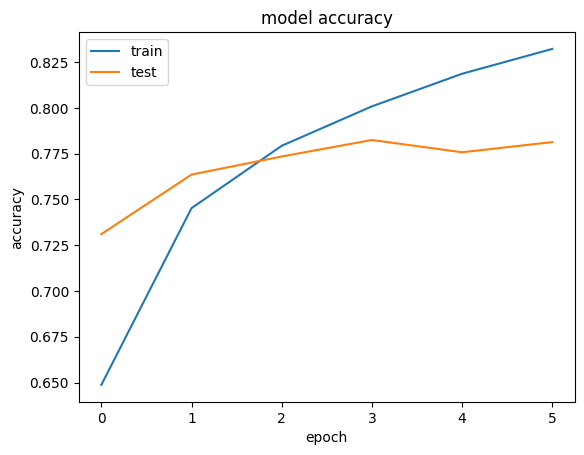

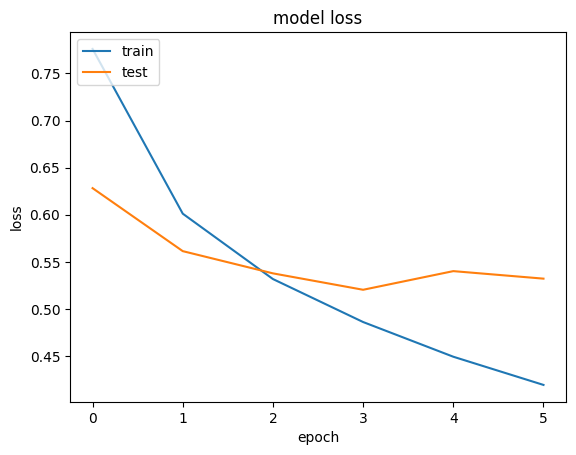

In [161]:
# Model Performance Charts

import matplotlib.pyplot as plt

plt.plot(cnn_model_history.history['acc'])
plt.plot(cnn_model_history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

plt.plot(cnn_model_history.history['loss'])
plt.plot(cnn_model_history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()

### RECURRENT NEURAL NETWORK (LSTM)

In [162]:
from keras.layers import LSTM 

Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_16 (Embedding)        │ (None, 100, 100)       │     8,208,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,350,611 (31.86 MB)

 Trainable params: 142,211 (555.51 KB)

 Non-trainable params: 8,208,400 (31.31 MB)

None
Epoch 1/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 246s 220ms/step - acc: 0.6169 - loss: 0.8293 - val_acc: 0.7232 - val_loss: 0.6542
Epoch 2/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 229s 209ms/step - acc: 0.7246 - loss: 0.6385 - val_acc: 0.7596 - val_loss: 0.6015
Epoch 3/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 249s 227ms/step - acc: 0.7682 - loss: 0.5650 - val_acc: 0.7884 - val_loss: 0.5432
Epoch 4/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 248s 226ms/step - acc: 0.7907 - loss: 0.5234 - val_acc: 0.7894 - val_loss: 0.5252
Epoch 5/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 235s 214ms/step - acc: 0.8109 - loss: 0.4907 - val_acc: 0.8114 - val_loss: 0.4932
Epoch 6/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 234s 213ms/step - acc: 0.8212 - loss: 0.4641 - val_acc: 0.8235 - val_loss: 0.4781
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 47s 34ms/step - acc: 0.8215 - loss: 0.4805
Test Score: 0.48125389218330383
Test Accuracy: 0.8215417861938477


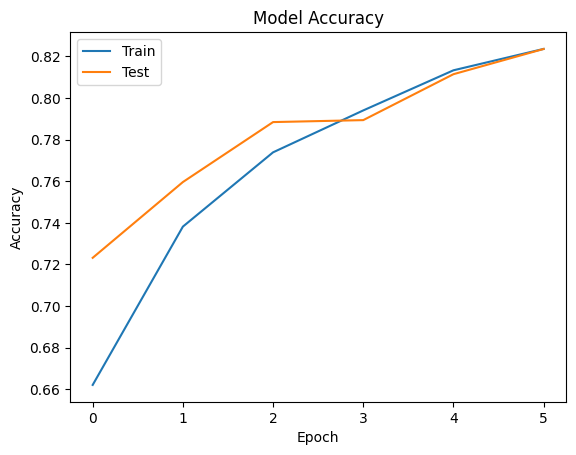

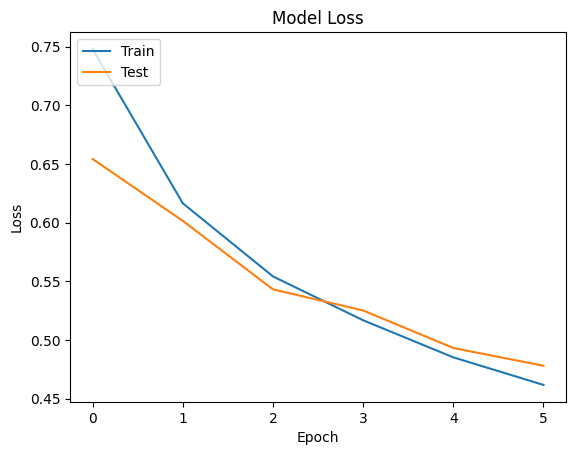

In [165]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

lstm_model = Sequential([
    Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=maxlen, trainable=False),
    LSTM(128, return_sequences=False),  # No need for GlobalMaxPooling1D
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')  # For multi-class classification
])

lstm_model.build(input_shape=(None, maxlen))

# Model compilation
from tensorflow.keras.optimizers import Adam
Optimizer = Adam(learning_rate=0.0005)  # Decrease the learning rate
lstm_model.compile(optimizer=Optimizer,loss='categorical_crossentropy',metrics=['acc'])
print(lstm_model.summary())

# Model training
lstm_model_history = lstm_model.fit(x_train, y_train, batch_size=128, epochs=6, verbose=1, validation_split=0.2)

# Predictions on the Test Set
score = lstm_model.evaluate(x_test, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

# Model Performance Charts
import matplotlib.pyplot as plt

plt.plot(lstm_model_history.history['acc'])
plt.plot(lstm_model_history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(lstm_model_history.history['loss'])
plt.plot(lstm_model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


#### Evaluate and Compare Models (CNN vs LSTM)

1371/1371 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step
1371/1371 ━━━━━━━━━━━━━━━━━━━━ 51s 37ms/step


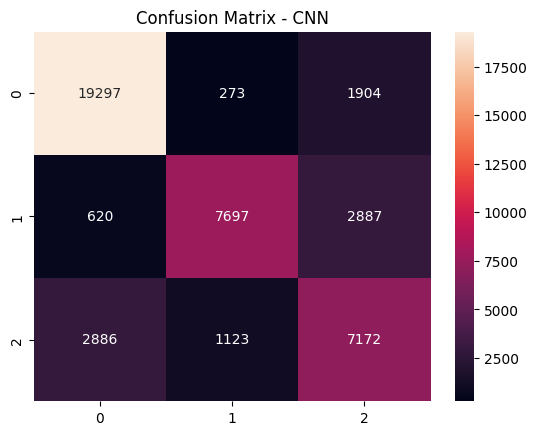

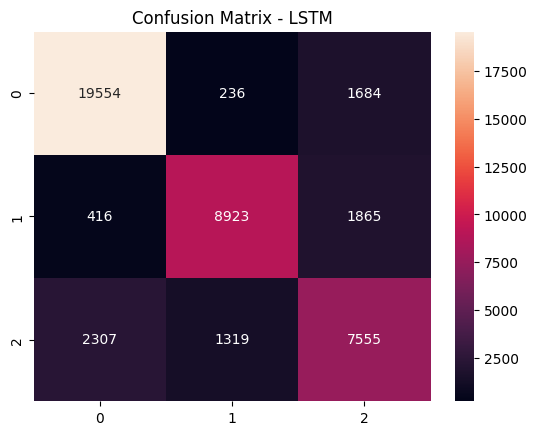

CNN Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87     21474
           1       0.85      0.69      0.76     11204
           2       0.60      0.64      0.62     11181

    accuracy                           0.78     43859
   macro avg       0.76      0.74      0.75     43859
weighted avg       0.78      0.78      0.78     43859

LSTM Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.91      0.89     21474
           1       0.85      0.80      0.82     11204
           2       0.68      0.68      0.68     11181

    accuracy                           0.82     43859
   macro avg       0.80      0.79      0.80     43859
weighted avg       0.82      0.82      0.82     43859



In [166]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Predictions
y_pred_cnn = cnn_model.predict(x_test)
y_pred_lstm = lstm_model.predict(x_test)

# Convert predictions from one-hot encoding to label indices
y_test_labels = np.argmax(y_test, axis=1)
y_pred_cnn_labels = np.argmax(y_pred_cnn, axis=1)
y_pred_lstm_labels = np.argmax(y_pred_lstm, axis=1)

# Confusion Matrix for CNN
conf_matrix_cnn = confusion_matrix(y_test_labels, y_pred_cnn_labels)
sns.heatmap(conf_matrix_cnn, annot=True, fmt='d')
plt.title('Confusion Matrix - CNN')
plt.show()

# Confusion Matrix for LSTM
conf_matrix_lstm = confusion_matrix(y_test_labels, y_pred_lstm_labels)
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d')
plt.title('Confusion Matrix - LSTM')
plt.show()

# Classification Report
print("CNN Classification Report:\n", classification_report(y_test_labels, y_pred_cnn_labels))
print("LSTM Classification Report:\n", classification_report(y_test_labels, y_pred_lstm_labels))


In [169]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)

# Training with callbacks
lstm_model_history = lstm_model.fit(
    x_train, y_train, 
    batch_size=128, 
    epochs=6, 
    verbose=1, 
    validation_split=0.2, 
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 243s 222ms/step - acc: 0.8336 - loss: 0.4457 - val_acc: 0.8297 - val_loss: 0.4685
Epoch 2/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 235s 214ms/step - acc: 0.8443 - loss: 0.4220 - val_acc: 0.8344 - val_loss: 0.4835
Epoch 3/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 641s 584ms/step - acc: 0.8515 - loss: 0.4080 - val_acc: 0.7979 - val_loss: 0.5192
Epoch 4/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 233s 213ms/step - acc: 0.8538 - loss: 0.4005 - val_acc: 0.8324 - val_loss: 0.4568
Epoch 5/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 231s 210ms/step - acc: 0.8607 - loss: 0.3859 - val_acc: 0.8384 - val_loss: 0.4453
Epoch 6/6
1097/1097 ━━━━━━━━━━━━━━━━━━━━ 233s 212ms/step - acc: 0.8605 - loss: 0.3839 - val_acc: 0.7769 - val_loss: 0.6034


In [171]:

# Save the model using the native Keras format
lstm_model.save(f"./c1_lstm_model_acc_{round(score[1], 3)}.keras")
